In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize, Clustering, Initializers
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from functools import partial

2025-04-09 15:14:24.652659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 15:14:24.669781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 15:14:24.674942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1744204466.080957 2650614 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744204466.125118 2650614 cuda_executor.cc:1015] succ

In [2]:
name = "3_200"
suffix = "_no_gap"

# unaligned sequences
train_filename = f"../trees/alisim/{name}{suffix}.fa"
# reference alignment of all sequences
ref_filename = f"../trees/alisim/{name}{suffix}.fa"
# tree used to generate the sequences
tree_filename = f"../trees/treegen/trees/{name}.nwk"

# number of distinct pHMMs
num_models = 1

In [3]:
out_filename = "test/data/interactive_alignment_star_tree.fasta"
with SequenceDataset(train_filename, fmt="fasta") as data:
    # compute a star-like tree to replicate learnMSAs default emitter with the tree emitter
    tree_handler = Clustering.star_tree(data.seq_ids)
    config = Configuration.make_default(num_models, 
                                        tree_handler=tree_handler,
                                        tree_loss_weight=1.0,
                                        use_tree_transitioner=False)
    config["epochs"] = [10, 5, 10]
    config["max_surgery_runs"] = 1
    config["len_mul"] = 1.0
    
    initial_model_length_callback = partial(Align.get_initial_model_lengths, random=False)
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        verbose=True,
                                        align_insertions=True,
                                        initial_model_length_callback=initial_model_length_callback)

Training of 1 models on file 3_200_no_gap.fa
Configuration: 
{
num_models : 1
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single

/home/felix/miniforge3/envs/learnMSAdev/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:731: UserWarning: Gradients do not exist for variables ['branch_lengths_kernel'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


10/10 - 10s - 1s/step - loss: 330.1439 - loglik: -2.5859e+02 - prior: -6.8714e+01 - aux_loss: 2.8399
Epoch 2/10
10/10 - 2s - 221ms/step - loss: 187.5131 - loglik: -1.6909e+02 - prior: -1.5613e+01 - aux_loss: 2.8095
Epoch 3/10
10/10 - 2s - 243ms/step - loss: 131.9155 - loglik: -1.2496e+02 - prior: -4.1388e+00 - aux_loss: 2.8208
Epoch 4/10
10/10 - 2s - 223ms/step - loss: 118.5025 - loglik: -1.1588e+02 - prior: 0.2123 - aux_loss: 2.8360
Epoch 5/10
10/10 - 3s - 251ms/step - loss: 114.7772 - loglik: -1.1434e+02 - prior: 2.3974 - aux_loss: 2.8346
Epoch 6/10
10/10 - 2s - 243ms/step - loss: 113.0165 - loglik: -1.1380e+02 - prior: 3.6175 - aux_loss: 2.8297
Epoch 7/10
10/10 - 2s - 240ms/step - loss: 112.1951 - loglik: -1.1372e+02 - prior: 4.3519 - aux_loss: 2.8296
Epoch 8/10
10/10 - 2s - 229ms/step - loss: 111.8074 - loglik: -1.1376e+02 - prior: 4.7827 - aux_loss: 2.8300
Epoch 9/10
10/10 - 2s - 232ms/step - loss: 111.2043 - loglik: -1.1347e+02 - prior: 5.0913 - aux_loss: 2.8290
Epoch 10/10
10/10

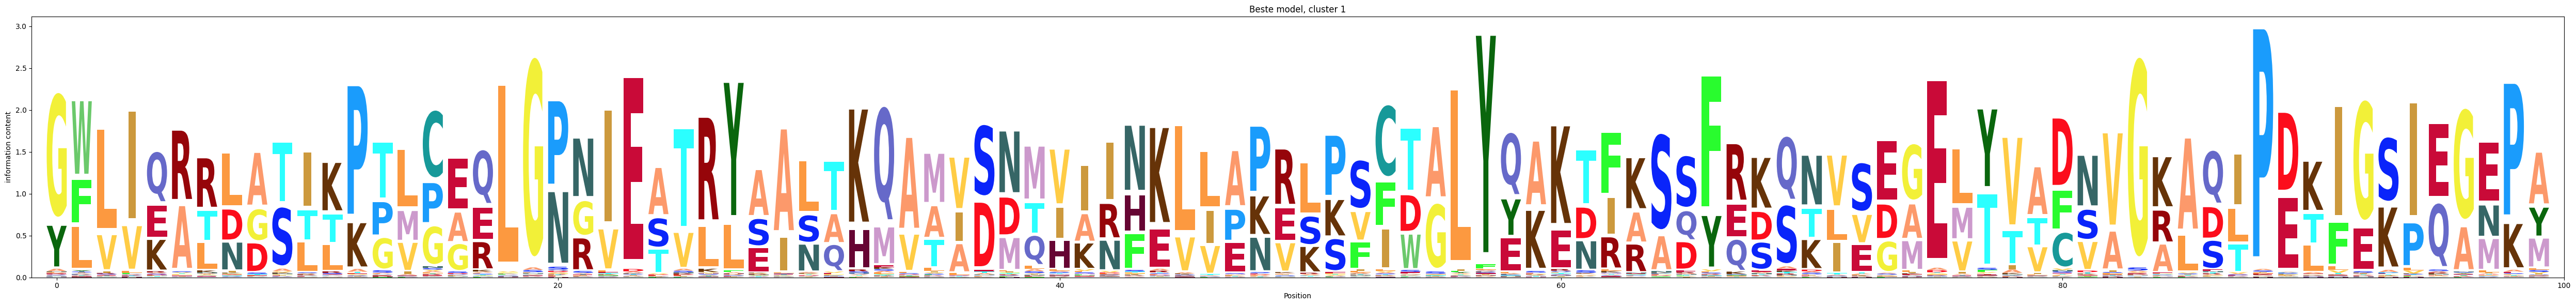

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title(f"Beste model, cluster 1")
ax.set_xlabel("Position")
ax.set_ylabel("Information content")
Visualize.plot_logo(alignment_model, alignment_model.best_model, ax, cluster_index=0)
plt.tight_layout()

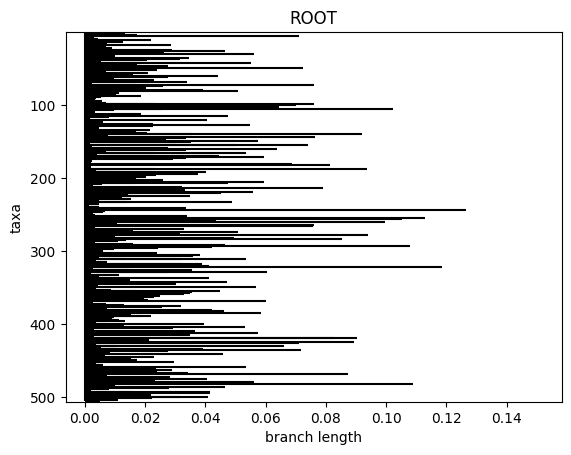

In [5]:
# get the branch lengths from the ancestral probability layer and plot the tree 
anc_prob_layer = alignment_model.encoder_model.layers[-3]
branch_lengths = anc_prob_layer.make_times().numpy()
branch_lengths = branch_lengths[:,alignment_model.best_model]
branch_lengths = branch_lengths[:,np.newaxis]

tree_handler.set_branch_lengths(branch_lengths)
tree_handler.draw(no_labels=True)

This tree - by design - does not contain the cluster structure inherent in the data. Edges are shorter than the path length to the root in the original tree would be. This is due to the fact that learnMSA is not a method to estimate these branch lengths, but a method to minimize the likelihood under a profile model with the ability to vary the branch lengths.